# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ANA 680/Week 3/winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [7]:
df['type'].replace(['white', 'red'], [0, 1], inplace=True)

In [8]:
df['type'].value_counts()

0    4898
1    1599
Name: type, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [10]:
for col, value in df.items():
    df[col] = df[col].fillna(df[col].mean())

In [11]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

missing data fixed with imputation

# Data Discovery

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
type,6497.0,0.246114,0.430779,0.00000,0.00000,0.00000,0.00000,1.00000
fixed acidity,6497.0,7.216579,1.295751,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339691,0.164548,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318722,0.145231,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.444326,4.757392,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056042,0.035031,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218395,0.160637,2.72000,3.11000,3.21000,3.32000,4.01000


free sulfur dioxide and total sulfur dioxide both have large ranges.  Will transform both.  

In [13]:
skew = df.skew().sort_values()
skew

total sulfur dioxide   -0.001177
quality                 0.189623
pH                      0.387234
citric acid             0.473142
density                 0.503602
alcohol                 0.565718
type                    1.179095
free sulfur dioxide     1.220066
residual sugar          1.435221
volatile acidity        1.496433
fixed acidity           1.724131
sulphates               1.799021
chlorides               5.400680
dtype: float64

Considering skew > |1.2| as not normally distributed.  

6 features are not normally distributed, however in most cases, except for fixed acidity, chlorides and sulphates, skew is not too bad.  

Above I considered transforming both free sulfur dioxide and total sulfur dioxide because of large range.  However, Total sulfur dioxide is normally distributed.  Total sulfur dioxide is no longer considered for transformation, given normal distribution.

In order to fix these issues, normalization will be conducted on all variables.     


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
df_x = df.select_dtypes(exclude=['object'])
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [16]:
scaler = StandardScaler()
scaler.fit(df_x)

StandardScaler()

In [17]:
scaled_data = scaler.transform(df_x)
scaled_data

array([[-0.57136659, -0.1671586 , -0.4235636 , ..., -0.5459591 ,
        -1.41855821,  0.20799905],
       [-0.57136659, -0.70742728, -0.24123152, ..., -0.27706392,
        -0.83161516,  0.20799905],
       [-0.57136659,  0.68183504, -0.36278624, ..., -0.6131829 ,
        -0.32852111,  0.20799905],
       ...,
       [ 1.75018984, -0.70742728,  1.03509307, ...,  1.47075478,
         0.42611996,  0.20799905],
       [ 1.75018984, -1.01615224,  1.85558744, ...,  1.2018596 ,
        -0.2446721 , -0.93722961],
       [ 1.75018984, -0.938971  , -0.18045416, ...,  0.86574062,
         0.42611996,  0.20799905]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49ef753f40>,
      dtype=object)

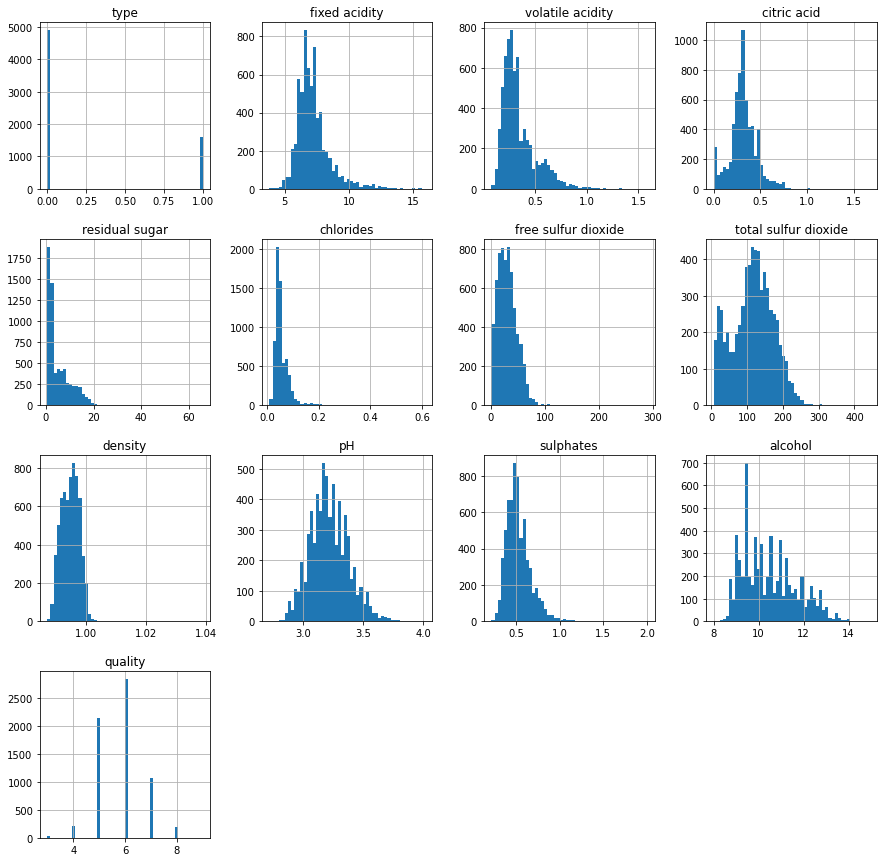

In [18]:
# histogram
df.hist(bins=50, figsize=(15, 15))

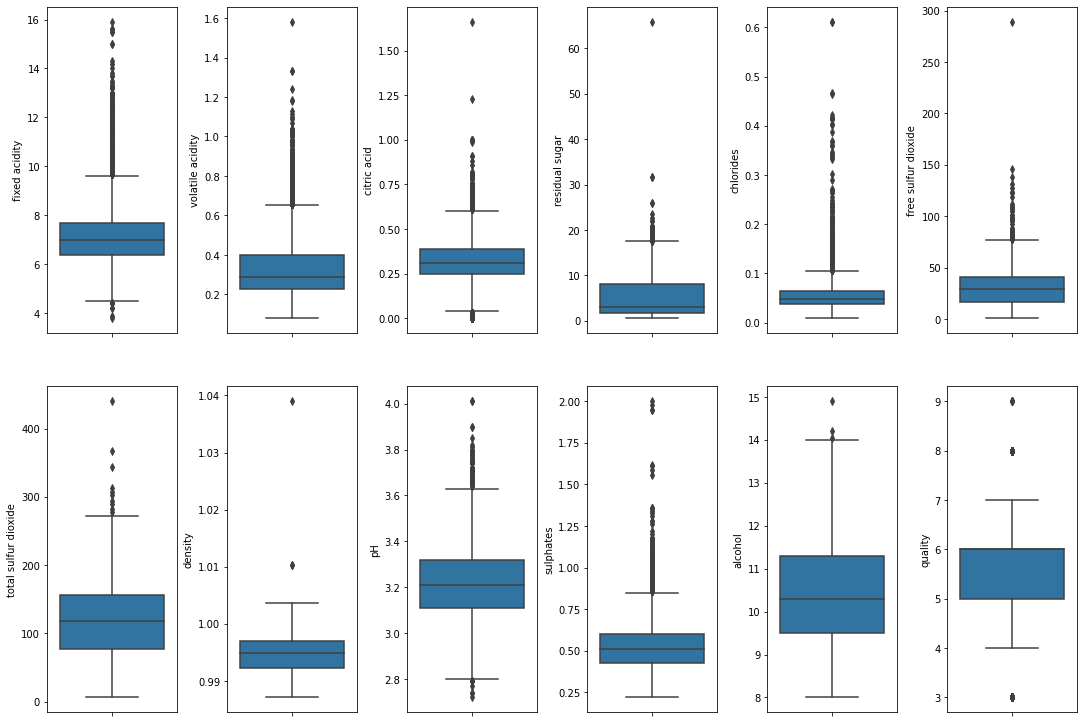

In [19]:
# boxplots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [20]:
df.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,0.486913,0.652606,-0.187073,-0.348982,0.512596,-0.471644,-0.700357,0.390645,0.328514,0.486662,-0.032970,-0.119323
fixed acidity,0.486913,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.652606,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,-0.187073,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.348982,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.512596,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.471644,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,-0.700357,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,0.390645,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,0.328514,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356


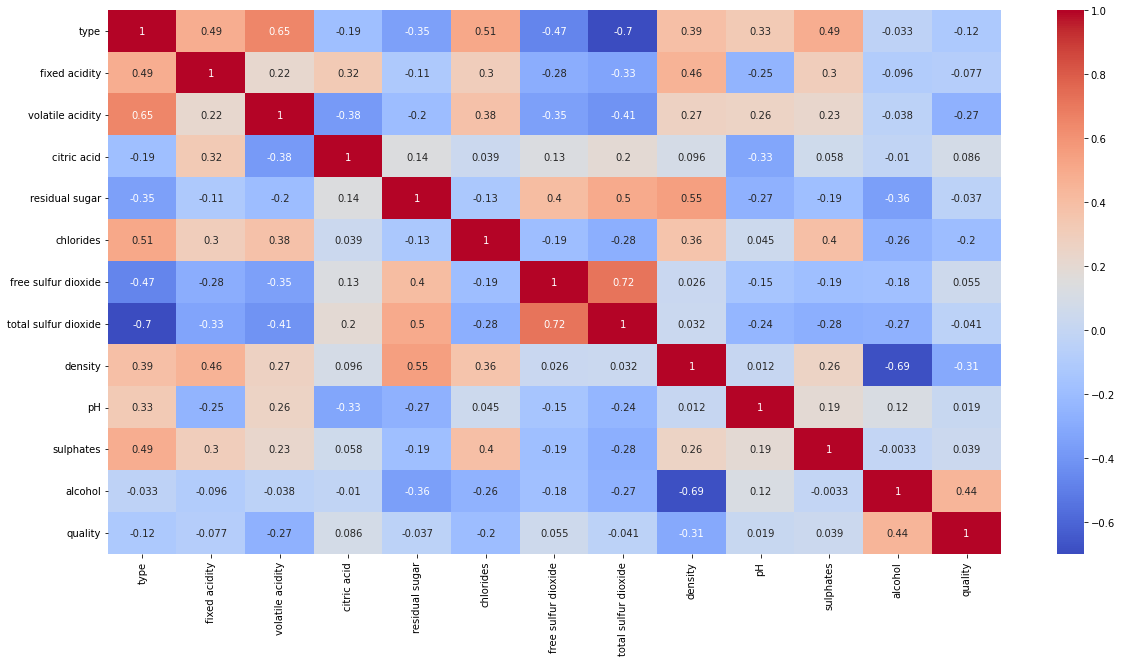

In [21]:
# Coorelation Matrix
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [22]:
corr.sort_values(['quality'],ascending=False,inplace=True)
corr.quality

quality                 1.000000
alcohol                 0.444319
citric acid             0.085699
free sulfur dioxide     0.055463
sulphates               0.038713
pH                      0.019356
residual sugar         -0.036819
total sulfur dioxide   -0.041385
fixed acidity          -0.076967
type                   -0.119323
chlorides              -0.200818
volatile acidity       -0.265838
density                -0.305858
Name: quality, dtype: float64

Alcohol, Density, volatile acidity, and chlorides have strongest correlations and will be used for model

# Split Data

In [23]:
# add best features from PCA
x = df[['alcohol', 'density', 'volatile acidity', 'chlorides']]
# Recall we had duplicate columns, must remove
y = df['quality']

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   alcohol           6497 non-null   float64
 1   density           6497 non-null   float64
 2   volatile acidity  6497 non-null   float64
 3   chlorides         6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In the past I have had difficulties with model accuracy because of imbalanced data.  It occured to me that I need to check and address this issue.

In [25]:
y.value_counts().sort_values()

9       5
3      30
8     193
4     216
7    1079
5    2138
6    2836
Name: quality, dtype: int64

We do not have enough values data for values of 9 and 3, possibly more.  I need to address this issue.

In [26]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
x, y = oversample.fit_resample(x, y)

In [27]:
y.value_counts().sort_values()

6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: quality, dtype: int64

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19852 entries, 0 to 19851
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   alcohol           19852 non-null  float64
 1   density           19852 non-null  float64
 2   volatile acidity  19852 non-null  float64
 3   chlorides         19852 non-null  float64
dtypes: float64(4)
memory usage: 620.5 KB


Issue resolved!  We have scaled input variables, and well balanced output variable.

We are ready for modeling

# Decision Tree

##Split Data Into Training and Test Sets

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini',random_state=1) 
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
result= pd.DataFrame({"y_test": y_test.ravel(), "Y-pred": y_pred.ravel()})
result.head(10)

,y_test,Y-pred
0,7,7
1,9,9
2,9,9
3,5,5
4,8,7
5,5,4
6,3,3
7,7,6
8,3,3
9,3,3


In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[689  14   5  13   7   4   2]
 [ 25 565  48  43  28   8   2]
 [ 27  63 436 115  45  10   0]
 [ 11  37 125 368  87  34   0]
 [ 21  20  37  85 524  40   6]
 [  5   8   7  29  54 594   2]
 [  2   0   0   2   1   0 715]]
              precision    recall  f1-score   support

           3       0.88      0.94      0.91       734
           4       0.80      0.79      0.79       719
           5       0.66      0.63      0.64       696
           6       0.56      0.56      0.56       662
           7       0.70      0.71      0.71       733
           8       0.86      0.85      0.86       699
           9       0.98      0.99      0.99       720

    accuracy                           0.78      4963
   macro avg       0.78      0.78      0.78      4963
weighted avg       0.78      0.78      0.78      4963



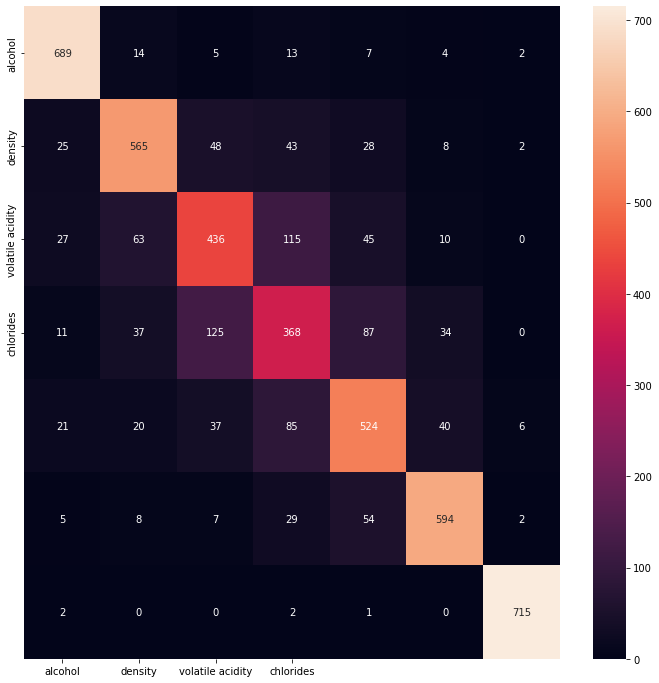

In [32]:
#Using seaborn heatmap to display the confusion matrix
plt.figure(figsize = (12,12))
x_axis_labels = x.columns
y_axis_labels = x_axis_labels
sns.heatmap(cm, annot = True, xticklabels = x_axis_labels, yticklabels = y_axis_labels, fmt = '0.0f')

In [33]:
import pickle
# Open a file and use dump() 
with open('dectree.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(model, file)